### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [633]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [634]:
data = pd.read_csv('data/coupons.csv')

In [635]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [636]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

#### Conclusions about data quality:

1. The car column has very little data, so it may not be meaning full as it only has entries for 0.0085% of the total entries, it is safe to drop

2. The following columns have incomplete values: CoffeeHouse, Bar, CarryAway, RestaurantLessThan20 & Restaurant20To50.    

3. CoffeeHouse being the worst case,  but that being 98.2% complete.   It is ok to simplify and remove all the rows with incomplete values, Let's explore dropping the 'car' column and the incomplete values, to see how much we lose

4. The column CoffeeHouse seems to have two redundant values "never" and "less1" we will merge those into a single value called "Never" at the end of the notebook to facilitate analysis of the independent investigation section

In [637]:
# clean data as mentioned above

# Remove the 'car' column b/c of so little data
data_clean = data.drop('car', axis=1)

# Define a dictionary for mapping the 'Y' column and create a new column that has better readability
mapping = {1: 'Yes', 0: 'No'}
# Use the map function to create a new column 'Accepted'
data_clean['Accepted'] = data_clean['Y'].map(mapping)

# Remove the rows/entries that have null values. 
data_clean = data_clean.dropna()

# This leaves us with 95.2% of the original data, but clean.  A 5% loss should not skew the final result. 
# We will proceed with this as our new cleaned data set

4. What proportion of the total observations chose to accept the coupon? 



In [657]:
# To answer this question we take the total number of valid entries using the len() function
# and a query with the coupon accceptance condition

print("Overall coupon acceptance: ", len(data_clean.query('Y == 1')) / len(data_clean) * 100, "%")


Overall coupon acceptance:  56.93352098683666 %


5. Use a bar plot to visualize the `coupon` column.

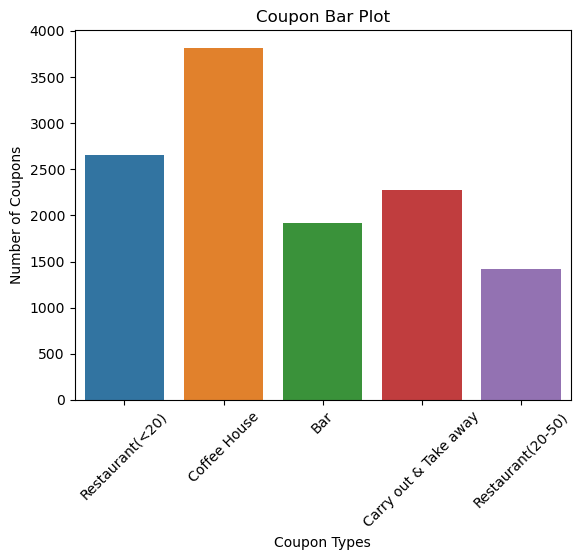

In [639]:
sns.countplot(x='coupon', data=data_clean)
plt.xticks(rotation=45)
# Add title and axis titles
plt.title('Coupon Bar Plot')
plt.xlabel('Coupon Types')  # X-axis title
plt.ylabel('Number of Coupons')       # Y-axis title
plt.show()

6. Use a histogram to visualize the temperature column.

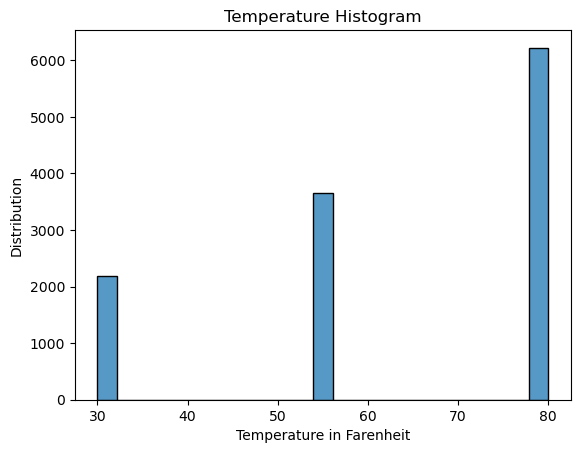

In [640]:
sns.histplot(data=data_clean, x='temperature')
# Add title and axis titles
plt.title('Temperature Histogram')
plt.xlabel('Temperature in Farenheit')  # X-axis title
plt.ylabel('Distribution')       # Y-axis title
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [641]:
data_bar = data_clean.query('coupon == "Bar"')
data_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [642]:
# We count the different values of column "Y" using the value_counts method
# Then divide the accpeted ver the total to get the acceptance rate
coupons_accepted = data_bar.value_counts('Y')[1] / len(data_bar)

# Use formatting for a clearer presentation
print("Proportion of Bar Coupons Accepted:", f"{coupons_accepted*100:.2f} %")

Proportion of Bar Coupons Accepted: 41.19 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [643]:
# Use plotly express for the histogram, as you can hover on the chart and see values...
fig = px.histogram(data_bar, x="Bar", color='Accepted', title='Bar Visit Frequency')
fig.update_layout(xaxis_title="# of Times visited", yaxis_title="Frequency")
fig.show()

# List for less than 3 as it is not numeric
possible_values_lt3 = ['never' , 'less1', '1~3']

went_to_bar_lt3_accepted = len(data_bar.query('(Y == 1) & (Bar in @possible_values_lt3)'))
went_to_bar_lt3_total = len(data_bar.query('Bar in @possible_values_lt3'))

went_to_bar_gt3_accepted = len(data_bar.query('(Y == 1) & (Bar not in @possible_values_lt3)'))
went_to_bar_gt3_total = len(data_bar.query('Bar not in @possible_values_lt3'))

print("Bar Visits/Coupons Acceptance Rate:")
print("\t(<= 3):", f"{went_to_bar_lt3_accepted / went_to_bar_lt3_total*100:.2f} %")
print("\t(>  3):", f"{went_to_bar_gt3_accepted / went_to_bar_gt3_total*100:.2f} %")

Bar Visits/Coupons Acceptance Rate:
	(<= 3): 37.27 %
	(>  3): 76.17 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [644]:
# Let's examine the contents of the 'age' column
# print(data_bar.value_counts('age'))

# we can see that is not an integer, so we will need a list of strings to apply logic conditions for the age column
# Create a list for the age greater than 25 
age_gt25 = ['50plus', '26', '31', '36', '41', '46'] 
more_t_month = ['4~8' , 'gt8', '1~3']


# Use plotly express for the histogram around the age, as you can hover on the chart and see values...
fig = px.histogram(data_bar.query('age in @age_gt25'), x="Bar", color='Accepted', title='Bar Visit Frequency >25 years old')
fig.update_layout(xaxis_title="# of Times visited", yaxis_title="Frequency")
fig.show()


went_to_bar_gtmo25_accepted = len(data_bar.query('(Y == 1) & (Bar in @more_t_month) & (age in @age_gt25)'))
went_to_bar_gtmo25_total = len(data_bar.query('(Bar in @more_t_month) & (age in @age_gt25)'))

# Acceptance rate of all 'others' drivers who go to a bar that are NOT > 25 and not visit more than a month
all_others = len(data_bar.query('(Y == 1)')) - went_to_bar_gtmo25_accepted

went_to_bar_all_drivers_rate = all_others / len(data_bar)

print("Bar Visits/Coupons Acceptance Rate:")
print("\tMore than once a month and greater than 25 y.o:", f"{went_to_bar_gtmo25_accepted / went_to_bar_gtmo25_total*100:.2f} %")
print("\tAll other drivers:", f"{went_to_bar_all_drivers_rate*100:.2f} %")

Bar Visits/Coupons Acceptance Rate:
	More than once a month and greater than 25 y.o: 68.98 %
	All other drivers: 26.66 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [645]:
# Note that this question is ambiguous and not well formulated.  The latter part is not clear what you can compare
# against, so assumptions are made and documented below

not_kid_passenger = ['Friend(s)', 'Partner']
more_t_month = ['4~8' , 'gt8', '1~3']

# Dataframe for the condition above
data_condition = data_bar.query('(Bar in @more_t_month) & (passanger in @not_kid_passenger) & ~(occupation == "Farming Fishing & Forestry" )')
acceptance_rate = len(data_condition.query('Y == 1')) / len(data_condition)
print("Acceptance rate more than once a month and no kid passenger and no farming/fishing/forestry:", f"{acceptance_rate*100:.2f} %")

# Comparing against all other combinations
kid_alone_passenger = ['Alone', 'Kid(s)']
less1_never = ['never' , 'less1']

# Dataframe for the condition above
data_condition2 = data_bar.query('(Bar in @less1_never) & (passanger in @kid_alone_passenger) & (occupation == "Farming Fishing & Forestry" )')
acceptance_rate2 = len(data_condition2.query('Y == 1')) / len(data_condition2)
print("Acceptance rate less than once a month and  kid passenger or alone and farming/fishing/forestry:", f"{acceptance_rate2*100:.2f} %")


Acceptance rate more than once a month and no kid passenger and no farming/fishing/forestry: 71.43 %
Acceptance rate less than once a month and  kid passenger or alone and farming/fishing/forestry: 50.00 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [646]:
# Create conditions for the queries
# Create queries and then calculate acceptance rates

condition1 = '(Bar in @more_t_month) & (passanger in @not_kid_passenger) & (maritalStatus != "Widowed")'
df_condition1 = data_bar.query(condition1)
acc_rate_cond1 = (df_condition1['Y'] == 1).sum() / len(df_condition1)


age_lt30 = ['21', '26', 'below21']
condition2 = '(Bar in @more_t_month) & (age in @age_lt30)'
df_condition2 = data_bar.query(condition2)
acc_rate_cond2 = (df_condition2['Y'] == 1).sum() / len(df_condition2)

# The assumption for bullet 3 above is that is that the acceptance rate is still for coupons 
# for bars BUT people that go to cheap restaurants.   The question is grammatically ambiguous
cheap_res_gt4 = ['4~8', 'gt8']
income_gt_50k = ['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
condition3 = '(RestaurantLessThan20 in @cheap_res_gt4) & (income in @income_gt_50k)'
df_condition3 = data_bar.query(condition3)
acc_rate_cond3 = (df_condition3['Y'] == 1).sum() / len(df_condition3)

print('Comparing the acceptance rate of the three conditions from question #6:')
print('AR1', f"{acc_rate_cond1*100:.2f} %")
print('AR2', f"{acc_rate_cond2*100:.2f} %")
print('AR3', f"{acc_rate_cond3*100:.2f} %")



Comparing the acceptance rate of the three conditions from question #6:
AR1 71.43 %
AR2 71.95 %
AR3 40.65 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Answer: 
Drivers who go to a bar once a month are the ones that end up with the highest acceptance rate of ~70%, other factors such as passengers, age, widowing didnt play a major role.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [647]:
# First look at the data to understand how many coupons per category exist. 
# We are going to explore how many coupons were accepted for Coffee House vs All the other categories.
# Using plotly to understand the overall coupon volume and category acceptance
fig = px.histogram(data_clean, x="coupon", color='Accepted', title='Coupon acceptance per category')
fig.update_layout(xaxis_title="Coupon Type", yaxis_title="Quantity")
fig.show()

I am picking the 'Coffee House' coupon category that has the most entries on the dataset and it is about 50/50 acceptance rate overall, so it could be an interesting analysis to understand who goes the most

In [648]:
# Subset the dataframe for coupon of type Coffee House
data_coffee = data_clean.query('coupon == "Coffee House" and Y == 1')

# Also will perform some cleaning and merge the values less1 and never as they mean the same thing 
# in the CoffeeHouse column
values_to_merge = ['less1', 'never']
data_coffee['CoffeeHouse'] = data_coffee['CoffeeHouse'].replace(values_to_merge, 'Never')

/var/folders/90/wvll1tvd7lbg0d62qn424chm0000gn/T/ipykernel_6686/136976420.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [649]:
chart_config = ['passanger', 'CoffeeHouse']

agg_df = data_coffee.groupby(chart_config).size().reset_index(name='Count')

fig = px.sunburst(agg_df, path=chart_config, values='Count',
                  title='Sunburst Chart')

# Show the plot
fig.show()

#### Initial conclusions
* See sunburst chart above to facilitate multi-dimensional categorical plot analysis
* 86% of the cases for the accepted coupons the passengers were friends or they were alone
* Of the people that accepted the coupon 64% has been there at least once
* 80% of the accepted coupons were going the opposite direction

In [650]:
# Acceptance Rate of people that have been in the CoffeeHouse at least once
len(data_coffee.query('CoffeeHouse != "Never"')) / len(data_coffee)

0.6499472016895459

In [651]:
# Calculating the acceptance rate when the passengers were friends or alone
passenger_cond = ['Alone', 'Friend(s)']

# Acceptance Rate of people that whose passengers are NOT Kids or partners
len(data_coffee.query('passanger in @passenger_cond')) / len(data_coffee)


0.8648363252375924

In [652]:
# Calculate acceptance ratio of cases were the driver was going in opposite direction
len(data_coffee.query('direction_opp == 1')) / len(data_coffee)

0.8009503695881732

In [653]:
chart_config = ['CoffeeHouse', 'gender', 'destination']

agg_df = data_coffee.groupby(chart_config).size().reset_index(name='Count')

fig = px.treemap(agg_df, path=chart_config, values='Count',
                  title='Treemap Chart')

# Show the plot
fig.show()

To add to the analysis, let's a do a treemap chart (see above) to help glance and take some visual conclusions:

* Regardless of gender and number of visits most of the drivers that accepted the coupon were going to "No urgent place"

In [654]:
columns_of_interest = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# Create a new column based on the position of the rightmost '1' in the selected columns
data_coffee_accepted['tt_Coupon'] = (data_coffee_accepted[columns_of_interest].iloc[:, ::-1] == 1).idxmax(axis=1).str.extract(r'(\d+)').astype(int)


In [655]:
chart_config = ['tt_Coupon', 'gender', 'occupation']

agg_df = data_coffee_accepted.groupby(chart_config).size().reset_index(name='Count')

fig = px.treemap(agg_df, path=chart_config, values='Count',
                  title='Treemap Chart Time To Coupon')

# Show the plot
fig.show()

In the second TreeMap chart (above) we have an additional analysis:
* Impact of time to get to the promo location
* Occupation
* Gender

This type of chart rally helps with visualization of multi-dimensional categorical datasets. We can conclude the following:

* Most accepted coupons are between 5 and 15 mins driving time
* The most popular occupations are Unemployed and Student.  Being Unemployed more prominent on females and student on males
* The Gender category is roughly 50/50, so that is likely not a factor